<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [39]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
houses = pd.read_csv(house_csv, date_parser = '%a %b %d %H:%M:%S EDT %Y')

In [3]:
houses.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [4]:
houses[(houses.beds==0) | (houses.baths ==0) | (houses.sq__ft == 0)].count()

street       171
city         171
zip          171
state        171
beds         171
baths        171
sq__ft       171
type         171
sale_date    171
price        171
latitude     171
longitude    171
dtype: int64

### Some data points with 0 beds, baths & sq__ft. These data points should be treated as null value.

In [5]:
houses.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


/Users/linhvien/opt/anaconda3/envs/iod/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds', ylabel='price'>

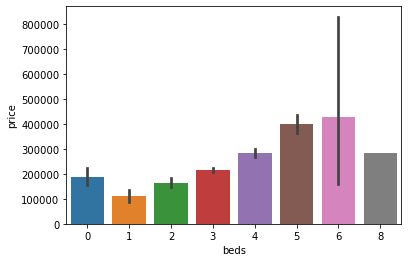

In [6]:
sns.barplot(houses.beds,houses.price)

In [7]:
houses.groupby(by = ["beds"]).count()

,street,city,zip,state,baths,sq__ft,type,sale_date,price,latitude,longitude
beds,,,,,,,,,,,
0,108,108,108,108,108,108,108,108,108,108,108
1,10,10,10,10,10,10,10,10,10,10,10
2,133,133,133,133,133,133,133,133,133,133,133
3,413,413,413,413,413,413,413,413,413,413,413
4,258,258,258,258,258,258,258,258,258,258,258
5,59,59,59,59,59,59,59,59,59,59,59
6,3,3,3,3,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1,1,1,1,1


### More bedrooms higher prices. It is noticeable that 6 bedrooms has a high variance in prices. 0 bedroom units' price mean is in between 2 and 3 bedroom ones. Fill 0 value with 2 unit bedrooms. 

In [8]:
houses['beds'].replace(to_replace = 0,value = 2,inplace = True)

In [9]:
houses[houses.beds ==2]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
...,...,...,...,...,...,...,...,...,...,...,...,...
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,2,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
951,2221 2ND AVE,SACRAMENTO,95818,CA,2,2,1089,Residential,Thu May 15 00:00:00 EDT 2008,205000,38.555781,-121.485331
953,5209 LAGUNA CREST WAY,ELK GROVE,95758,CA,2,2,1189,Residential,Thu May 15 00:00:00 EDT 2008,207000,38.424421,-121.443915
954,416 LEITCH AVE,SACRAMENTO,95815,CA,2,1,795,Residential,Thu May 15 00:00:00 EDT 2008,207973,38.612694,-121.456669


/Users/linhvien/opt/anaconda3/envs/iod/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baths', ylabel='price'>

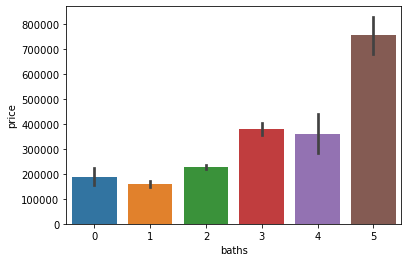

In [10]:
sns.barplot(houses.baths,houses.price)

In [11]:
houses.groupby(by = ["baths"]).count()

,street,city,zip,state,beds,sq__ft,type,sale_date,price,latitude,longitude
baths,,,,,,,,,,,
0,108,108,108,108,108,108,108,108,108,108,108
1,180,180,180,180,180,180,180,180,180,180,180
2,544,544,544,544,544,544,544,544,544,544,544
3,132,132,132,132,132,132,132,132,132,132,132
4,19,19,19,19,19,19,19,19,19,19,19
5,2,2,2,2,2,2,2,2,2,2,2


### More bedrooms more bathrooms. There is a significant increase in prices between 2 vs 3 bathroom properties, and 1 vs 2 bathroom properties. 4 bathroom property prices are not following the trend. The reason could be the number of bedrooms or square feet. So It makes sense to create a new features to incorporate bedrooms and bathrooms. 0 bathroom is in between 1 and 2 bathroom property, let's fill 0 bathroom with 1


In [12]:
houses['baths'].replace(to_replace = 0, value = 1, inplace = True)

/Users/linhvien/opt/anaconda3/envs/iod/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baths', ylabel='price'>

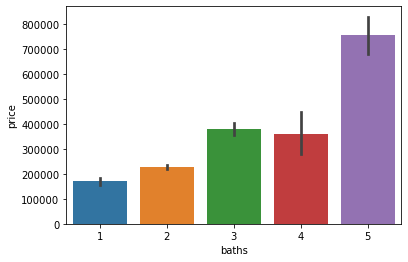

In [13]:
sns.barplot(houses.baths,houses.price)

In [14]:
houses['beds_baths'] = houses.beds+houses.baths

In [15]:
houses.groupby(by = ["beds_baths"]).count()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
beds_baths,,,,,,,,,,,,
2,10,10,10,10,10,10,10,10,10,10,10,10
3,186,186,186,186,186,186,186,186,186,186,186,186
4,143,143,143,143,143,143,143,143,143,143,143,143
5,315,315,315,315,315,315,315,315,315,315,315,315
6,186,186,186,186,186,186,186,186,186,186,186,186
7,79,79,79,79,79,79,79,79,79,79,79,79
8,53,53,53,53,53,53,53,53,53,53,53,53
9,9,9,9,9,9,9,9,9,9,9,9,9
10,2,2,2,2,2,2,2,2,2,2,2,2


/Users/linhvien/opt/anaconda3/envs/iod/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds_baths', ylabel='price'>

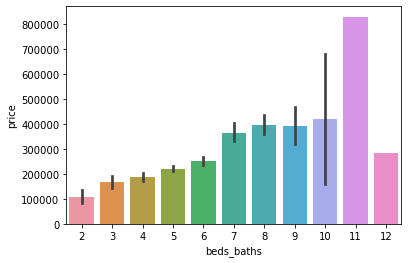

In [16]:
sns.barplot(houses.beds_baths,houses.price)

/Users/linhvien/opt/anaconda3/envs/iod/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq__ft', ylabel='price'>

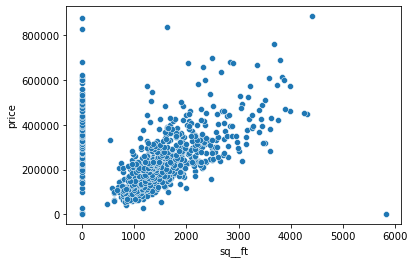

In [17]:
sns.scatterplot(houses.sq__ft,houses.price)

### Larger the properties are, higher their prices

/Users/linhvien/opt/anaconda3/envs/iod/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='price'>

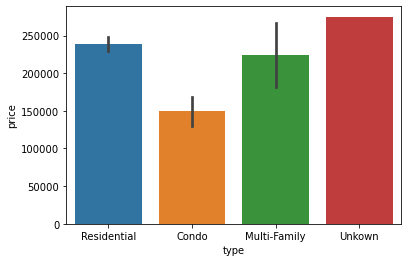

In [18]:
sns.barplot(houses.type,houses.price)

### The houses' type also affects house prices. For example, Condo is cheaper than multi family and residential. 

In [19]:
houses['sale_date1'] = houses.sale_date.apply(lambda x: datetime.strptime(x,'%a %b %d %H:%M:%S EDT %Y'))

In [20]:
houses.sale_date.unique()

array(['Wed May 21 00:00:00 EDT 2008', 'Tue May 20 00:00:00 EDT 2008',
       'Mon May 19 00:00:00 EDT 2008', 'Fri May 16 00:00:00 EDT 2008',
       'Thu May 15 00:00:00 EDT 2008'], dtype=object)

### These data are from 15 -21 May 2008 which is a short period of time

In [21]:
round(houses.groupby(by=["city"])['street'].count()/houses.city.count()*100,2)

city
ANTELOPE            3.35
AUBURN              0.51
CAMERON PARK        0.91
CARMICHAEL          2.03
CITRUS HEIGHTS      3.55
COOL                0.10
DIAMOND SPRINGS     0.10
EL DORADO           0.20
EL DORADO HILLS     2.34
ELK GROVE          11.57
ELVERTA             0.41
FAIR OAKS           0.91
FOLSOM              1.73
FORESTHILL          0.10
GALT                2.13
GARDEN VALLEY       0.10
GOLD RIVER          0.41
GRANITE BAY         0.30
GREENWOOD           0.10
LINCOLN             7.31
LOOMIS              0.20
MATHER              0.10
MEADOW VISTA        0.10
NORTH HIGHLANDS     2.13
ORANGEVALE          1.12
PENRYN              0.10
PLACERVILLE         1.02
POLLOCK PINES       0.30
RANCHO CORDOVA      2.84
RANCHO MURIETA      0.30
RIO LINDA           1.32
ROCKLIN             1.73
ROSEVILLE           4.87
SACRAMENTO         44.57
SHINGLE SPRINGS     0.10
SLOUGHHOUSE         0.10
WALNUT GROVE        0.10
WEST SACRAMENTO     0.30
WILTON              0.51
Name: street, dtype:

In [22]:
(houses.groupby(by=["city"])['street'].count()>20).sum()

10

### Only 10 out of 28 cities in the dataset have 20 or more observations. Therefore, there is not enough data if we use city to predict prices. 

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [23]:
# ANSWER: Price is the target variable in this dataset, because it has correllation with other variable in the dataset

#### 2.2 List all possible variables which might be Predictor variable.

In [24]:
# ANSWER: beds, baths , beds + baths , type, square feet. During EDA, there are correllation between the number of 
# bedrooms, bathrooms, type, square feet and prices
houses.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude,beds_baths
zip,1.000000,0.032651,-0.007303,0.130108,-0.093353,-0.290389,-0.539904,0.016200
beds,0.032651,1.000000,0.724478,0.613124,0.411618,-0.189570,0.009686,0.945211
baths,-0.007303,0.724478,1.000000,0.598064,0.470384,-0.149383,0.076430,0.909813
sq__ft,0.130108,0.613124,0.598064,1.000000,0.333897,-0.383274,-0.177742,0.652406
price,-0.093353,0.411618,0.470384,0.333897,1.000000,-0.039573,0.284485,0.470610
latitude,-0.290389,-0.189570,-0.149383,-0.383274,-0.039573,1.000000,0.387925,-0.184888
longitude,-0.539904,0.009686,0.076430,-0.177742,0.284485,0.387925,1.000000,0.042030
beds_baths,0.016200,0.945211,0.909813,0.652406,0.470610,-0.184888,0.042030,1.000000


In [25]:
Y = houses['price']
X = houses['beds']

<AxesSubplot:xlabel='beds', ylabel='price'>

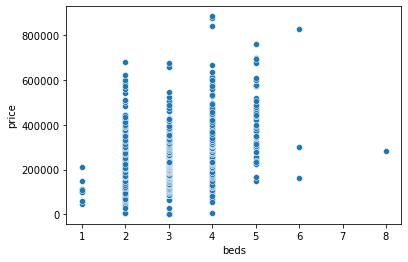

In [26]:
sns.scatterplot(x = houses['beds'], y= houses['price'])

<AxesSubplot:xlabel='baths', ylabel='price'>

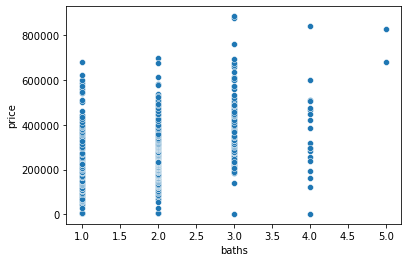

In [27]:
sns.scatterplot(x = houses['baths'], y =houses['price'])

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

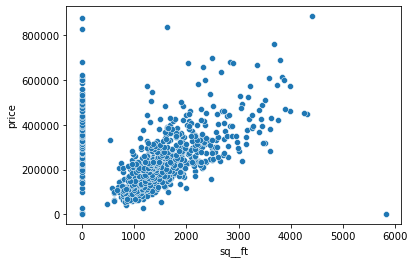

In [28]:
sns.scatterplot(x = houses['sq__ft'], y = houses['price'])

### From the above scatterplots, square feet shows a strong relationship with prices.

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

<AxesSubplot:>

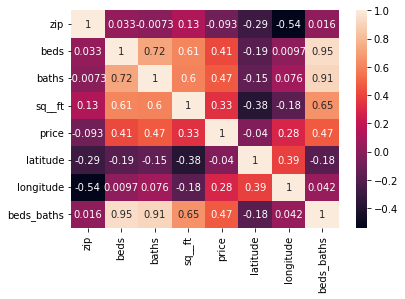

In [29]:
# ANSWER
sns.heatmap(houses.corr(),annot=True)

In [30]:
#sq__ft is the best predictors, and it also have strong correlation with beds and baths

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [31]:
# ANSWER: The simpliest way to predict prices is mean of prices 
houses['y_hat'] = houses['price'].mean()

In [32]:
X = houses['sq__ft']
Y = houses['price']
Yhat = houses['y_hat']

In [33]:
import matplotlib as plt
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

In [34]:
draw_plot(X,Y,Yhat)

TypeError: 'module' object is not callable

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [ ]:
# ANSWER
res = abs(houses['price'] - houses['y_hat']).mean()
res

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [47]:
# ANSWER
X = houses['sq__ft']
Y = houses['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [48]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [49]:
beta_1 = calculate_beta_1(X, Y)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [50]:
# ANSWER
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [51]:
beta_0 = calculate_beta_0(X, Y)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [54]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x


In [55]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [ ]:
# ANSWER
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [ ]:
resi = calculate_residual(Y, Yhat)
abs(resi)

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [37]:
# ANSWER
def r_square(y,yhat):
    ss_tot = ((y-y.mean())**2).sum()
    ss_res = ((y-yhat)**2).sum()
    r2 = 1 - (ss_res/ss_tot)
    return r2
r2 = r_square(Y,Yhat)
r2

0.0

##### 2.7.F [BONUS] Draw Plot of Predicted Line

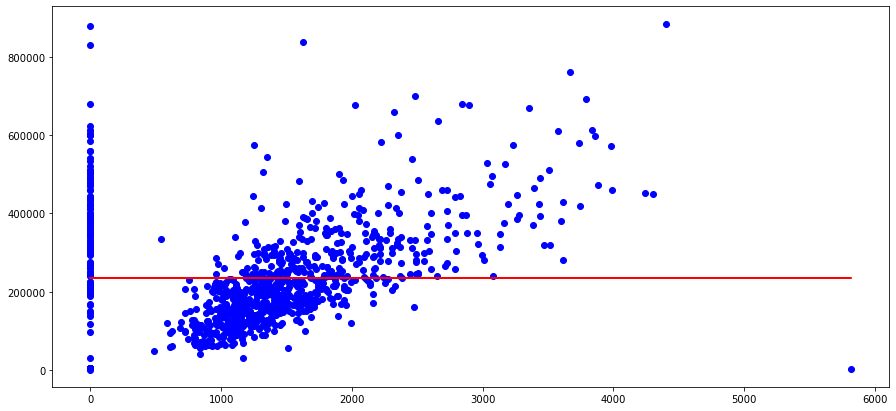

In [40]:
# ANSWER
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

NameError: name 'data' is not defined

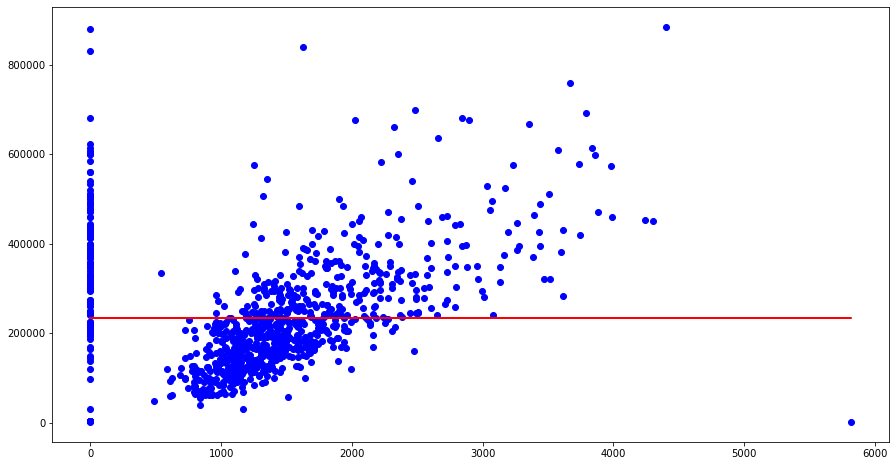

In [41]:
# ANSWER
houses['Yhat'] = Yhat
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [56]:
# ANSWER
xpred = 1204
Yhat = calculate_yhat(xpred, beta_0, beta_1)
Yhat


228137.1635919888



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



